<a href="https://colab.research.google.com/github/vidhi-sys/StreamLit_12Days/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data=pd.read_csv('churn.csv')

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [34]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
data.drop('customerID', axis='columns', inplace=True)

In [36]:
pd.to_numeric(data['TotalCharges'], errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [37]:
data.drop(data[pd.to_numeric(data['TotalCharges'], errors='coerce').isnull()].index, inplace=True)

In [38]:
data.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


Text(0, 0.5, 'customers count')

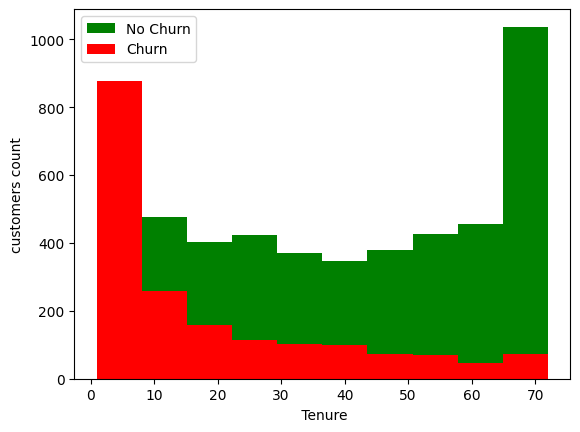

In [39]:
plt.hist(data[data['Churn'] == 'No']['tenure'],color='green', label='No Churn')
plt.hist(data[data['Churn'] == 'Yes']['tenure'],color='red', label='Churn')
plt.legend()
plt.xlabel(" Tenure")
plt.ylabel("customers count")

In [65]:
for col in data:
  if data[col].dtype=='object':

    print(f'{col }:{data[col].unique()}')

InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [53]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [74]:
for col in data:
  if data[col].dtype=='object':

    print(f'{col }:{data[col].unique()}')



Contract:['Month-to-month' 'One year' 'Two year']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [66]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [67]:
for i in yes_no_columns:
  data[i].replace({'Yes':1,'No':0},inplace=True)

/tmp/ipython-input-1922396661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].replace({'Yes':1,'No':0},inplace=True)
/tmp/ipython-input-1922396661.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[i].replace({'Yes':1,'No':0},inplace=True)


In [63]:
data['gender'].replace({'Female':1,'Male':0},inplace=True)

/tmp/ipython-input-188846015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipython-input-188846015.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'].replace({'Female':1,'Male':0},inplace=True)


ENCODING

In [69]:
internet_service_dummies = pd.get_dummies(data['InternetService'], prefix='InternetService', dtype=int)
data = pd.concat([data, internet_service_dummies], axis='columns')
data.drop('InternetService', axis='columns', inplace=True)

In [77]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,contracts_Month-to-month,contracts_One year,contracts_Two year
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [72]:
payment_method_dummies = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod', dtype=int)
data = pd.concat([data, payment_method_dummies], axis='columns')
data.drop('PaymentMethod', axis='columns', inplace=True)

In [76]:
contract_dummies=pd.get_dummies(data['Contract'],prefix="contracts",dtype=int)
data=pd.concat([data,contract_dummies],axis='columns')
data.drop('Contract',axis='columns',inplace=True)

In [78]:
data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,contracts_Month-to-month,contracts_One year,contracts_Two year
927,1,0,0,0,13,1,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
4767,0,0,1,1,1,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3583,0,0,1,1,40,0,0,0,1,1,...,1,0,0,0,0,0,1,0,1,0


In [80]:
data.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


SCALING

In [81]:
cols_toscale=['tenure','TotalCharges','MonthlyCharges']


In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


data.dropna(subset=['TotalCharges'], inplace=True)


scaler.fit(data[cols_toscale])

MinMaxScaler()

In [87]:
X=data.drop('Churn',axis='columns')
y=data['Churn']

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X , y ,test_size=0.2,random_state=42)

In [93]:
len(X.columns)

26

Deep Learning

In [99]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'), #input layer
    keras.layers.Dense(15,activation='relu'), # hidden layer
    keras.layers.Dense(1,activation='sigmoid') #output layer
    ])
model.compile(
    optimizer='nadam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=50)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6994 - loss: 3.5177
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7507 - loss: 0.8345
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7726 - loss: 0.7144
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7492 - loss: 0.7861
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7501 - loss: 0.7868
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7848 - loss: 0.8560
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7651 - loss: 0.7614
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7570 - loss: 0.8556
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7649 - loss: 0.6801
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7821 - loss: 0.7012
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.6367
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy